<a href="https://colab.research.google.com/github/CandraHarefa/UAS-candra-kecerdasan-buatan/blob/main/UAS_KB_candra_andri_putra_harefa_221011401892_05TPLE018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
def dingin(suhu):
    if suhu <= 18:
        return 1
    elif 18 < suhu <= 22:
        return (22 - suhu) / (22 - 18)
    else:
        return 0

def sejuk(suhu):
    if 18 <= suhu <= 22:
        return (suhu - 18) / (22 - 18)
    elif 22 < suhu <= 27:
        return (27 - suhu) / (27 - 22)
    else:
        return 0

def hangat(suhu):
    if 22 <= suhu <= 27:
        return (suhu - 22) / (27 - 22)
    elif 27 < suhu <= 32:
        return (32 - suhu) / (32 - 27)
    else:
        return 0

def panas(suhu):
    if suhu > 32:
        return 1
    elif 27 < suhu <= 32:
        return (suhu - 27) / (32 - 27)
    else:
        return 0

# Membership functions for Kelembapan
def rendah(kelembapan):
    if kelembapan <= 30:
        return 1
    elif 30 < kelembapan <= 50:
        return (50 - kelembapan) / (50 - 30)
    else:
        return 0

def sedang(kelembapan):
    if 30 <= kelembapan <= 50:
        return (kelembapan - 30) / (50 - 30)
    elif 50 < kelembapan <= 70:
        return (70 - kelembapan) / (70 - 50)
    else:
        return 0

def tinggi(kelembapan):
    if kelembapan > 70:
        return 1
    elif 50 < kelembapan <= 70:
        return (kelembapan - 50) / (70 - 50)
    else:
        return 0

# Output crisp values for fan speed
def kecepatan_lambat(d):
    return 10 + d * (20 - 10)  # Kecepatan Lambat (10 - 20)

def kecepatan_sedang(d):
    return 20 + d * (30 - 20)  # Kecepatan Sedang (20 - 30)

def kecepatan_cepat(d):
    return 30 + d * (40 - 30)  # Kecepatan Cepat (30 - 40)

def kecepatan_sangat_cepat(d):
    return 40 + d * (50 - 40)  # Kecepatan Sangat Cepat (40 - 50)

# Input suhu dan kelembapan
suhu_input = 25  # Misal suhu yang diinput adalah 25°C
kelembapan_input = 60  # Misal kelembapan yang diinput adalah 60%

# Derajat keanggotaan suhu pada masing-masing kategori
mu_dingin = dingin(suhu_input)
mu_sejuk = sejuk(suhu_input)
mu_hangat = hangat(suhu_input)
mu_panas = panas(suhu_input)

# Derajat keanggotaan kelembapan pada masing-masing kategori
mu_rendah = rendah(kelembapan_input)
mu_sedang = sedang(kelembapan_input)
mu_tinggi = tinggi(kelembapan_input)

# Inferensi (menggunakan minimum dari derajat keanggotaan input)
# Contoh aturan fuzzy:
# Aturan 1: Jika suhu dingin DAN kelembapan rendah, maka kecepatan lambat
z1 = kecepatan_lambat(min(mu_dingin, mu_rendah))

# Aturan 2: Jika suhu sejuk DAN kelembapan sedang, maka kecepatan sedang
z2 = kecepatan_sedang(min(mu_sejuk, mu_sedang))

# Aturan 3: Jika suhu hangat DAN kelembapan tinggi, maka kecepatan cepat
z3 = kecepatan_cepat(min(mu_hangat, mu_tinggi))

# Aturan 4: Jika suhu panas DAN kelembapan tinggi, maka kecepatan sangat cepat
z4 = kecepatan_sangat_cepat(min(mu_panas, mu_tinggi))

# Defuzzifikasi menggunakan rata-rata tertimbang (Weighted Average)
numerator = (mu_dingin * z1) + (mu_sejuk * z2) + (mu_hangat * z3) + (mu_panas * z4)
denominator = mu_dingin + mu_sejuk + mu_hangat + mu_panas

if denominator != 0:
    z_defuzzifikasi = numerator / denominator
else:
    z_defuzzifikasi = 0

print(f"Hasil defuzzifikasi (kecepatan kipas) untuk suhu {suhu_input}°C dan kelembapan {kelembapan_input}% adalah: {z_defuzzifikasi:.2f} RPM")


Hasil defuzzifikasi (kecepatan kipas) untuk suhu 25°C dan kelembapan 60% adalah: 30.60 RPM


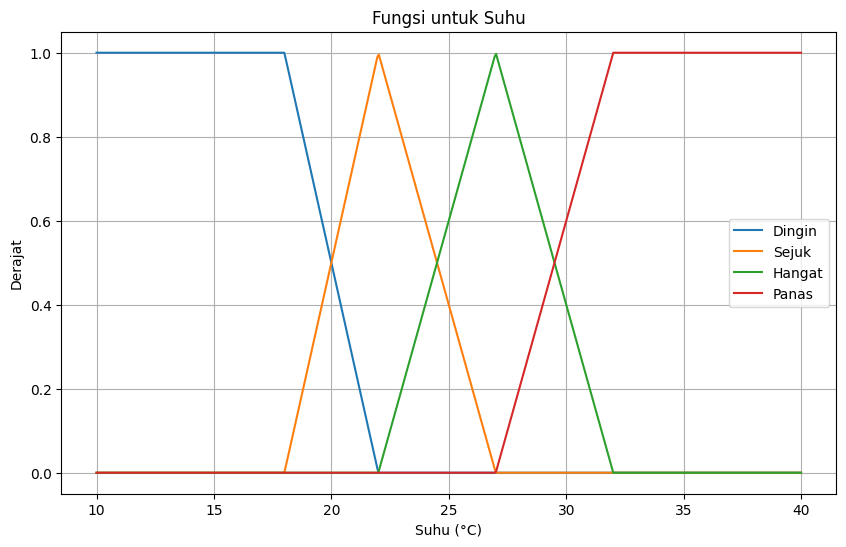

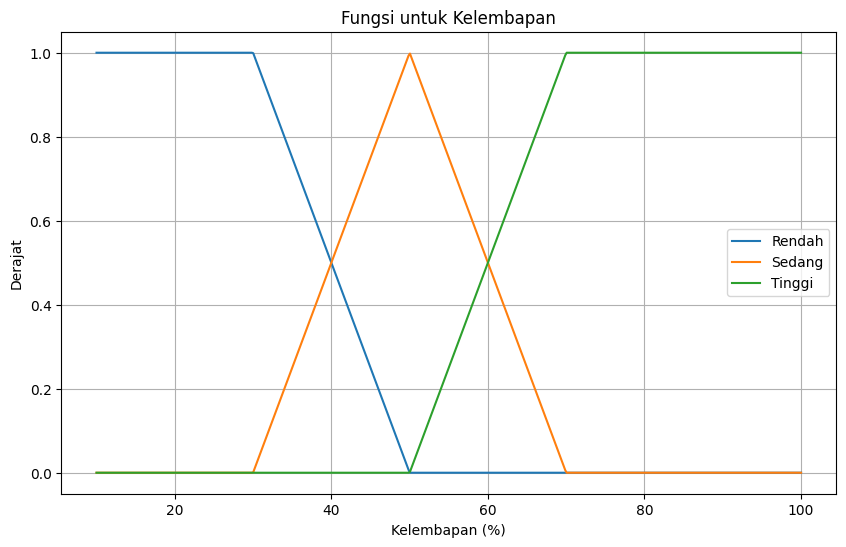

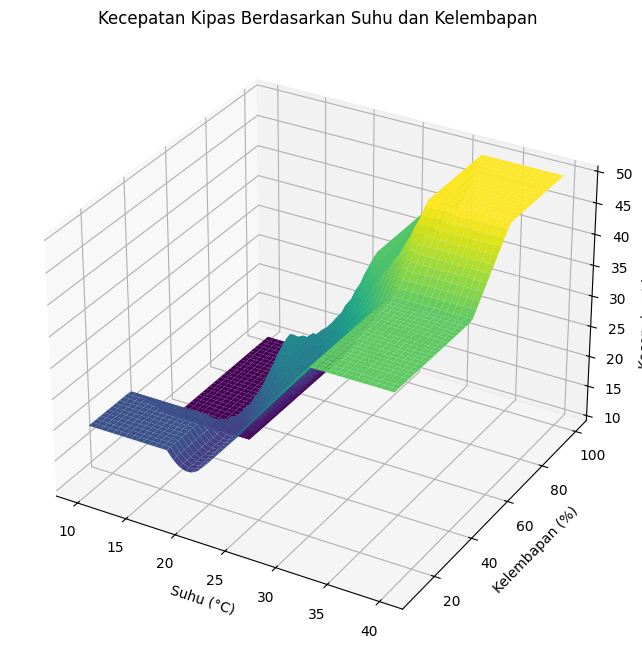

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Membership functions for Suhu
def dingin(suhu):
    if suhu <= 18:
        return 1
    elif 18 < suhu <= 22:
        return (22 - suhu) / (22 - 18)
    else:
        return 0

def sejuk(suhu):
    if 18 <= suhu <= 22:
        return (suhu - 18) / (22 - 18)
    elif 22 < suhu <= 27:
        return (27 - suhu) / (27 - 22)
    else:
        return 0

def hangat(suhu):
    if 22 <= suhu <= 27:
        return (suhu - 22) / (27 - 22)
    elif 27 < suhu <= 32:
        return (32 - suhu) / (32 - 27)
    else:
        return 0

def panas(suhu):
    if suhu > 32:
        return 1
    elif 27 < suhu <= 32:
        return (suhu - 27) / (32 - 27)
    else:
        return 0

def rendah(kelembapan):
    if kelembapan <= 30:
        return 1
    elif 30 < kelembapan <= 50:
        return (50 - kelembapan) / (50 - 30)
    else:
        return 0

def sedang(kelembapan):
    if 30 <= kelembapan <= 50:
        return (kelembapan - 30) / (50 - 30)
    elif 50 < kelembapan <= 70:
        return (70 - kelembapan) / (70 - 50)
    else:
        return 0

def tinggi(kelembapan):
    if kelembapan > 70:
        return 1
    elif 50 < kelembapan <= 70:
        return (kelembapan - 50) / (70 - 50)
    else:
        return 0

def kecepatan_lambat(d):
    return 10 + d * (20 - 10)  # Kecepatan Lambat (10 - 20)

def kecepatan_sedang(d):
    return 20 + d * (30 - 20)  # Kecepatan Sedang (20 - 30)

def kecepatan_cepat(d):
    return 30 + d * (40 - 30)  # Kecepatan Cepat (30 - 40)

def kecepatan_sangat_cepat(d):
    return 40 + d * (50 - 40)  # Kecepatan Sangat Cepat (40 - 50)

suhu_range = np.linspace(10, 40, 500)
kelembapan_range = np.linspace(10, 100, 500)

plt.figure(figsize=(10, 6))
plt.plot(suhu_range, [dingin(s) for s in suhu_range], label="Dingin")
plt.plot(suhu_range, [sejuk(s) for s in suhu_range], label="Sejuk")
plt.plot(suhu_range, [hangat(s) for s in suhu_range], label="Hangat")
plt.plot(suhu_range, [panas(s) for s in suhu_range], label="Panas")
plt.title("Fungsi untuk Suhu")
plt.xlabel("Suhu (°C)")
plt.ylabel("Derajat")
plt.legend()
plt.grid()
plt.show()

# Plot membership functions for Kelembapan
plt.figure(figsize=(10, 6))
plt.plot(kelembapan_range, [rendah(k) for k in kelembapan_range], label="Rendah")
plt.plot(kelembapan_range, [sedang(k) for k in kelembapan_range], label="Sedang")
plt.plot(kelembapan_range, [tinggi(k) for k in kelembapan_range], label="Tinggi")
plt.title("Fungsi untuk Kelembapan")
plt.xlabel("Kelembapan (%)")
plt.ylabel("Derajat")
plt.legend()
plt.grid()
plt.show()

# 3D Surface Plot for Defuzzification
def fuzzy_fan_speed(suhu, kelembapan):
    # Derajat suhu
    mu_dingin = dingin(suhu)
    mu_sejuk = sejuk(suhu)
    mu_hangat = hangat(suhu)
    mu_panas = panas(suhu)

    # Derajat kelembapan
    mu_rendah = rendah(kelembapan)
    mu_sedang = sedang(kelembapan)
    mu_tinggi = tinggi(kelembapan)

    # Inferensi
    z1 = kecepatan_lambat(min(mu_dingin, mu_rendah))
    z2 = kecepatan_sedang(min(mu_sejuk, mu_sedang))
    z3 = kecepatan_cepat(min(mu_hangat, mu_tinggi))
    z4 = kecepatan_sangat_cepat(min(mu_panas, mu_tinggi))

    # Defuzzifikasi
    numerator = (mu_dingin * z1) + (mu_sejuk * z2) + (mu_hangat * z3) + (mu_panas * z4)
    denominator = mu_dingin + mu_sejuk + mu_hangat + mu_panas

    return numerator / denominator if denominator != 0 else 0

# Generate 3D data
suhu_vals = np.linspace(10, 40, 50)
kelembapan_vals = np.linspace(10, 100, 50)
X, Y = np.meshgrid(suhu_vals, kelembapan_vals)
Z = np.array([[fuzzy_fan_speed(s, k) for s in suhu_vals] for k in kelembapan_vals])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("Kecepatan Kipas Berdasarkan Suhu dan Kelembapan")
ax.set_xlabel("Suhu (°C)")
ax.set_ylabel("Kelembapan (%)")
ax.set_zlabel("Kecepatan Kipas (RPM)")
plt.show()
